In [15]:
import mlflow
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import numpy as np

In [16]:
#load data
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris.data, iris.target, test_size=0.3, random_state=42
)

In [18]:
# Start MLflow experiment

mlflow.set_experiment("iris_rf_experiment")

with mlflow.start_run():
    # Model and hyperparameters
    model = RandomForestClassifier(n_estimators=100, max_depth=5)
    model.fit(X_train, y_train)
    
    # Predictions
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)

    # Logging
    mlflow.log_param("n_estimators", 100)
    mlflow.log_param("max_depth", 5)
    mlflow.log_metric("accuracy", acc)
    
    input_example = np.array([X_train[0]])

    mlflow.sklearn.log_model(model, "random_forest_model",input_example=input_example)
    
    
    print("Run ID:", mlflow.active_run().info.run_id)
    print("Tracking URI:", mlflow.get_tracking_uri())


    print(f"Logged accuracy: {acc}")

2025/08/07 17:34:57 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.


Run ID: 2789dac2837b493bbc2b79a0123a04e9
Tracking URI: file:///C:/Users/shantanu.hule/Documents/Learning/MLflow/mlruns
Logged accuracy: 1.0


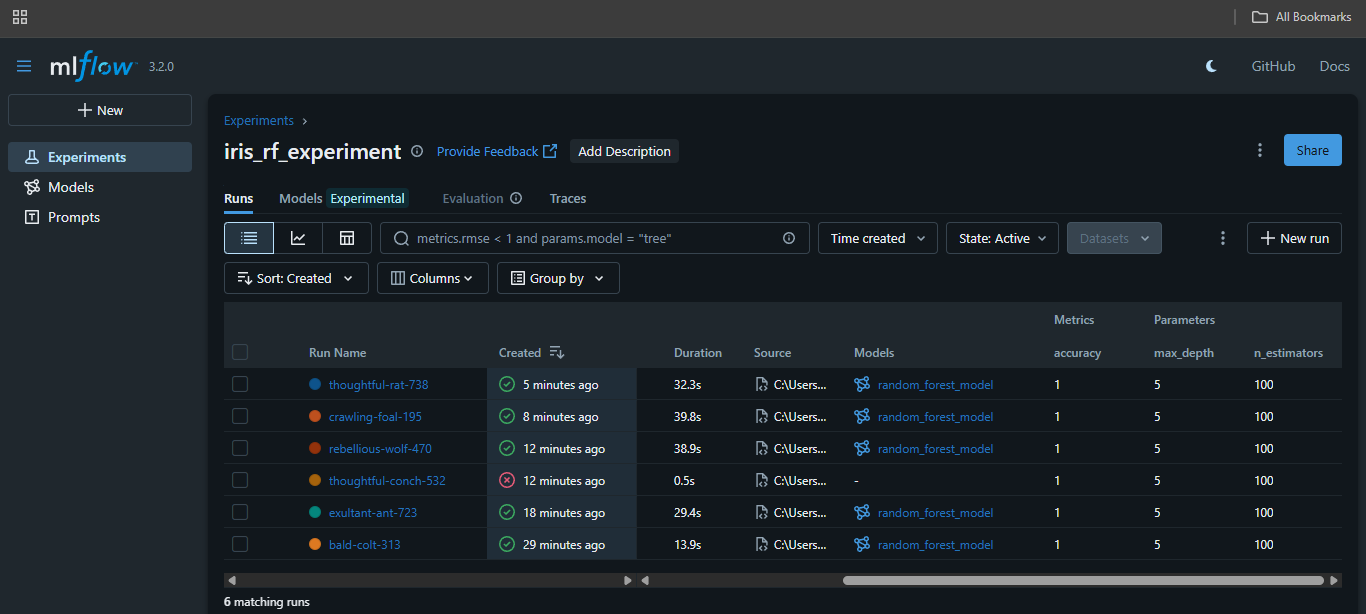